In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
#mount google drive folder
drive = drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/myocardial_data/myocardial_db.csv', index_col=0)

Mounted at /content/drive


In [4]:
df.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,...,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180.0,100.0,0.0,0.0,0.0,...,0.0,138.0,NaN,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,90.0,0.0,0.0,0.0,...,0.0,132.0,0.38,0.18,NaN,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,180.0,100.0,0.0,0.0,0.0,...,0.0,132.0,0.30,0.11,NaN,10.8,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,70.0,0.0,0.0,0.0,...,0.0,146.0,0.75,0.37,NaN,NaN,NaN,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,100.0,160.0,90.0,0.0,0.0,0.0,...,0.0,132.0,0.45,0.22,NaN,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#Rule: Variables with more than 60% missing values should not be considered
df.drop(columns=['KFK_BLOOD', 'IBS_NASL', 'S_AD_KBRIG', 'D_AD_KBRIG'], inplace=True)

In [6]:
#numerical variables
numerical_variables=['AGE'#, 'S_AD_KBRIG', 'D_AD_KBRIG'
, 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD'#, 'KFK_BLOOD'
, 'L_BLOOD', 'ROE']

#categorical variables
categorical_variables=['SEX', 'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03'#, 'IBS_NASL'
, 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09'
, 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02'
, 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST'
, 'GT_POST', 'FIB_G_POST', 'IM_PG_P'
, 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06'
, 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02'
, 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06'
, 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01'
, 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06'
, 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10'
, 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03'
, 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'GIPER_NA', 'NA_KB'
, 'NOT_NA_KB', 'LID_KB', 'NITR_S'
, 'LID_S_n', 'B_BLOK_S_n'
, 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n']

#ordinal variables
ordinal_variables=['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'DLIT_AG',
                   'ant_im', 'lat_im', 'inf_im', 'post_im', 'TIME_B_S',
                   'ZSN_A', #partially ordinal
                   'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n',  #1 day
                   'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n',  #2 day
                   'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n' #3 day
                   ]

In [7]:
#Convert all numerical variables to floats
for var in numerical_variables:
    df[var]=df[var].astype(float)

#fill null values in numerical variables
for i in numerical_variables:
  df[i]=df[i].interpolate(method='linear', limit_direction='both')
  df[i]=df[i].fillna(df[i].median())

In [8]:
for i in ordinal_variables:
  df[i]=df[i].fillna(df[i].mode()[0])

In [9]:
#fill null values in binary variables with mode

for i in categorical_variables:
  df[i]=df[i].fillna(df[i].mode()[0])  
  df[i]=df[i].astype(int)  

In [10]:
null_values=pd.DataFrame(df.isna().sum()/(len(df))*100).reset_index()
null_values.rename(columns={'index':'Variable',0:'null_perc'}, inplace=True)
null_values.sort_values(by='null_perc', ascending=False)

,Variable,null_perc
0,AGE,0.0
75,fibr_ter_06,0.0
87,R_AB_1_n,0.0
86,TIME_B_S,0.0
85,ROE,0.0
...,...,...
35,K_SH_POST,0.0
34,O_L_POST,0.0
33,D_AD_ORIT,0.0
32,S_AD_ORIT,0.0


In [11]:
#Feature scaling: Standardize data in numerical variables
for var in numerical_variables:
    df[var]=(df[var] - df[var].mean())/df[var].std()
df.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,...,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.343342,1,2.0,1.0,1.0,2.0,3.0,0,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.539367,1.034363,0,0,0,0,0,0,...,0.702749,0,0.239365,-0.273879,-0.435117,-0.238007,0.223117,4.0,0.0,0.0,1.0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.609888,1,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.399095,0.477461,0,0,0,0,0,0,...,-0.953452,0,-0.739790,-0.273879,-0.435117,-0.297588,-0.960060,2.0,0.0,0.0,0.0,1,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.876238,1,0.0,0.0,0.0,2.0,2.0,0,2.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.539367,1.034363,0,0,0,0,0,0,...,-0.263368,0,-0.739790,-0.488865,-0.799963,0.596127,-0.982813,3.0,3.0,0.0,0.0,1,1,1,0,1.0,0.0,0.0,3.0,2.0,2.0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.544293,0,0.0,0.0,0.0,2.0,2.0,0,3.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.399095,-0.636342,0,0,0,0,0,0,...,-0.401385,0,1.544905,0.720434,0.555179,0.223746,-1.005567,2.0,0.0,0.0,1.0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,-0.165972,1,0.0,0.0,0.0,2.0,3.0,0,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.893213,0.477461,0,0,0,0,0,0,...,-0.953452,0,-0.739790,-0.085765,-0.226634,-0.148635,-1.028320,9.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#define different sets for the different moments of prediction
df0=df[['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST'#, 'IBS_NASL'
, 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03'
, 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09'
, 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02'
, 'zab_leg_03', 'zab_leg_04', 'zab_leg_06'#, 'S_AD_KBRIG', 'D_AD_KBRIG'
, 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST'
, 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P'
, 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06'
, 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02'
, 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06'
, 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01'
, 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06'
, 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10'
, 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03'
, 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K'
, 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD'#, 'KFK_BLOOD'
, 'L_BLOOD', 'ROE', 'TIME_B_S', 'NA_KB'
, 'NOT_NA_KB', 'LID_KB', 'NITR_S'
, 'LID_S_n', 'B_BLOK_S_n'
, 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 
'ZSN']]

df1=df[['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST'#, 'IBS_NASL'
, 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03'
, 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09'
, 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02'
, 'zab_leg_03', 'zab_leg_04', 'zab_leg_06'#, 'S_AD_KBRIG', 'D_AD_KBRIG'
, 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST'
, 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P'
, 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06'
, 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02'
, 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06'
, 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01'
, 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06'
, 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10'
, 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03'
, 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K'
, 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD'#, 'KFK_BLOOD'
, 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'NA_KB'
, 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n'
, 'NOT_NA_1_n', 'LID_S_n', 'B_BLOK_S_n'
, 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 
'ZSN']]

df2=df[['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST'#, 'IBS_NASL'
, 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03'
, 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09'
, 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02'
, 'zab_leg_03', 'zab_leg_04', 'zab_leg_06'#, 'S_AD_KBRIG', 'D_AD_KBRIG'
, 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST'
, 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P'
, 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06'
, 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02'
, 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06'
, 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01'
, 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06'
, 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10'
, 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03'
, 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K'
, 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD'#, 'KFK_BLOOD'
, 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'NA_KB'
, 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n'
, 'NOT_NA_1_n', 'NOT_NA_2_n', 'LID_S_n', 'B_BLOK_S_n'
, 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 
'ZSN']]

df3=df[['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST'#, 'IBS_NASL'
, 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03'
, 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09'
, 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02'
, 'zab_leg_03', 'zab_leg_04', 'zab_leg_06'#, 'S_AD_KBRIG', 'D_AD_KBRIG'
, 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST'
, 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P'
, 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06'
, 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02'
, 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06'
, 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01'
, 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06'
, 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10'
, 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03'
, 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K'
, 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD'#, 'KFK_BLOOD'
, 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB'
, 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n'
, 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n'
, 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 
'ZSN']]

Modelling

In [53]:
X=df0.drop('ZSN', axis=1)
y=df0['ZSN']

In [54]:
# summarize class distribution
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 1306, 1: 394})


In [55]:
#scale_pos_weight for balancing the classifier
scale_pos_weight=(1306/394)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=2)

In [57]:
print ('Train data has %i rows and %i columns' % (X_train.shape[0], X_train.shape[1]))
print ('Test data has %i rows and %i columns' % (X_test.shape[0], X_test.shape[1]))

Train data has 1360 rows and 98 columns
Test data has 340 rows and 98 columns


In [58]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                    y_train,
                                                    test_size=0.2,
                                                    stratify=y_train,
                                                    random_state=2)

In [59]:
print ('Train data has %i rows and %i columns' % (X_train.shape[0], X_train.shape[1]))
print ('Validation data has %i rows and %i columns' % (X_val.shape[0], X_val.shape[1]))

Train data has 1088 rows and 98 columns
Validation data has 272 rows and 98 columns


Search for best parameters

Text(0.5, 1.0, 'Correlation Matrix')

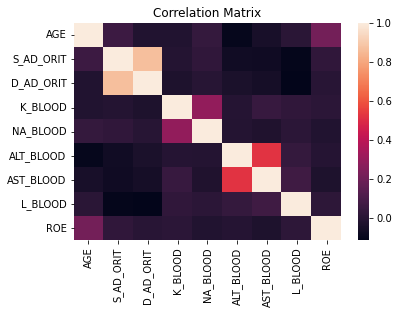

In [20]:
import matplotlib.pyplot     as plt
import seaborn               as sns
corr_mat  = df[numerical_variables].corr()
sns.heatmap(corr_mat)
plt.title("Correlation Matrix")

# XGBoost

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from xgboost import XGBClassifier

HyperParameter Tuning with GridSearch


In [60]:
from sklearn.metrics import roc_auc_score
results_dict = {}

#obtaining default parameters by calling .fit() to XGBoost model instance
xgbc0 = xgb.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)
xgbc0.fit(X_train , y_train)

#extracting default parameters from benchmark model
default_params = {}
gparams = xgbc0.get_params()
#default parameters have to be wrapped in lists - even single values - so GridSearchCV can take them as inputs
for key in gparams.keys():
    gp = gparams[key]
    default_params[key] = [gp]

#benchmark model. Grid search is not performed, since only single values are provided as parameter grid.
#However, cross-validation is still executed
clf0 = GridSearchCV(estimator=xgbc0, scoring='recall', param_grid=default_params, return_train_score=True, verbose=1, cv=3)
clf0.fit(X_train, y_train.values.ravel())

#results dataframe
df = pd.DataFrame(clf0.cv_results_)

train_predictions = clf0.predict(X_train)
val_predictions = clf0.predict(X_val)
test_predictions = clf0.predict(X_test)
val_ras = roc_auc_score(y_val, clf0.predict_proba(X_val)[:,1])
unseen_ras = roc_auc_score(y_test, clf0.predict_proba(X_test)[:,1])

bp = clf0.best_params_
print(bp)

y_pred_test0 = clf0.predict(X_test)
print(classification_report(y_test, y_pred_test0))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'eval_metric': 'auc', 'gamma': 0, 'grow_policy': 'lossguide', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'tree_method': 'hist', 'use_label_encoder': False, 'verbosity': 1}
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       267
           1       0.71      0.23      0.35        73

    accuracy                           0.81       340
   macro avg       0.77      0.60      0.62       340
weighted avg       0.80      0.81      0.78       340



Hyperparameter tuning doesn't really contribute as knowing well the problems is a human ability. What GridSearch does is maximizing accuracy. I will keep  parameters from GridSearch but change the scale_pos_weight

In [64]:
grid = {'learning_rate':0.1, 'max_depth':3, 'n_estimators': 100, 'reg_lambda': 1, 'scale_pos_weight':3.315, 'subsample': 1, 'tree_method': 'hist', 'use_label_encoder': False, 'verbosity': 1}
clf = XGBClassifier()
clf.set_params(**grid)

XGBClassifier(scale_pos_weight=3.315, tree_method='hist',
              use_label_encoder=False)

In [66]:
clf.fit(X_train, y_train)

XGBClassifier(scale_pos_weight=3.315, tree_method='hist',
              use_label_encoder=False)

In [ ]:
y_pred_val0 = clf.predict(X_val)
print(classification_report(y_val, y_pred_val0))

Changing the weights to balance the model improves a lot the performance of the model on predicting the CHF, but there's still room for improvement.


In [26]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importance:")

for f in range(X_train.shape[1]):
    print("Feature %s (%f)" % (X_train.columns[int(indices[f])], importances[indices[f]]))

Feature importance:
Feature ZSN_A (0.075381)
Feature ANT_CA_S_n (0.032053)
Feature lat_im (0.031581)
Feature MP_TP_POST (0.030850)
Feature ant_im (0.029276)
Feature NOT_NA_KB (0.029268)
Feature endocr_01 (0.028212)
Feature K_SH_POST (0.027275)
Feature AGE (0.026440)
Feature n_r_ecg_p_03 (0.026373)
Feature ritm_ecg_p_01 (0.024172)
Feature SEX (0.023203)
Feature L_BLOOD (0.023154)
Feature B_BLOK_S_n (0.022718)
Feature O_L_POST (0.021691)
Feature S_AD_ORIT (0.021610)
Feature GB (0.021379)
Feature ALT_BLOOD (0.021278)
Feature zab_leg_02 (0.020086)
Feature ROE (0.020052)
Feature D_AD_ORIT (0.019478)
Feature NA_KB (0.019007)
Feature zab_leg_01 (0.018145)
Feature INF_ANAM (0.018050)
Feature TIME_B_S (0.017640)
Feature K_BLOOD (0.016942)
Feature DLIT_AG (0.016911)
Feature STENOK_AN (0.016844)
Feature AST_BLOOD (0.016651)
Feature NITR_S (0.015955)
Feature NA_BLOOD (0.015838)
Feature LID_S_n (0.015444)
Feature inf_im (0.014738)
Feature IM_PG_P (0.014732)
Feature TRENT_S_n (0.014690)
Feature fibr

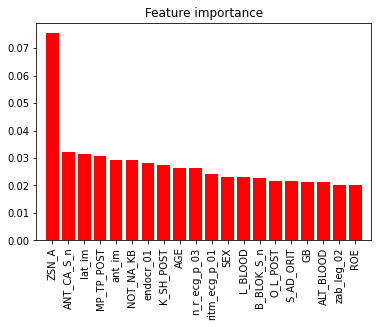

In [31]:
top=20
plt.figure()
plt.title("Feature importance")
plt.bar(range(top), importances[indices][0:top],
       color="r", align="center")
xticks_labels = [X_train.columns[i] for i in indices[0:top]]
plt.xticks(range(top), xticks_labels, rotation=90)
plt.xlim([-1, top])
plt.show()

Threshold selection

In [28]:
y_proba = clf.predict_proba(X_val)[:,1]
y_proba

array([0.35279182, 0.6461031 , 0.5782498 , 0.3075825 , 0.33368134,
       0.1755921 , 0.51370174, 0.6582708 , 0.39362407, 0.2647236 ,
       0.27638364, 0.40408885, 0.15842816, 0.3683687 , 0.12946229,
       0.43568295, 0.9510749 , 0.8047846 , 0.55060244, 0.54148126,
       0.22458532, 0.21979184, 0.14495935, 0.2935214 , 0.13158649,
       0.24897042, 0.18968321, 0.3768378 , 0.21101642, 0.40979058,
       0.18945532, 0.206662  , 0.6404004 , 0.29308718, 0.15000968,
       0.2549107 , 0.09575032, 0.42812157, 0.7375198 , 0.377036  ,
       0.24912845, 0.28160062, 0.32904786, 0.39771688, 0.48182616,
       0.2975158 , 0.4964858 , 0.32172284, 0.94585425, 0.12481634,
       0.2509174 , 0.36543325, 0.6188709 , 0.62535864, 0.9708311 ,
       0.26836172, 0.27484357, 0.14045918, 0.17471924, 0.952457  ,
       0.23186196, 0.26463747, 0.02474477, 0.8103195 , 0.42971689,
       0.18298371, 0.19970818, 0.7341466 , 0.5345207 , 0.4083093 ,
       0.17357893, 0.05120796, 0.45147666, 0.4166442 , 0.22538

In [29]:
f1_dict = {}
TNR_dict = {}
TPR_dict = {}
proba_array =  np.arange(0.1, 0.9, 0.05).tolist()

for umbral in proba_array:
    
    y_pred_pc = [1 if i > umbral else 0 for i in y_proba]
    
    f1 = f1_score(y_val, y_pred_pc, average = 'macro')
    
    f1_dict[umbral] = f1
    
    CM =confusion_matrix(y_val, y_pred_pc)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    
    TNR_dict[umbral] = TN/(TN+FP)
    
    TPR_dict[umbral] = TP/(TP+FN)

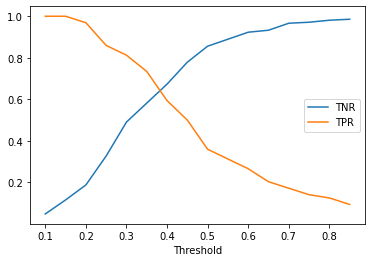

In [30]:
import matplotlib.pylab as plt

lists = sorted(TNR_dict.items()) # sorted by key, return a list of tuples

tnr_x, tnr_y = zip(*lists)

lists2 = sorted(TPR_dict.items()) # sorted by key, return a list of tuples

tpr_x, tpr_y = zip(*lists2)

plt.plot(tnr_x, tnr_y, label='TNR')
plt.plot(tpr_x, tpr_y, label='TPR')
plt.xlabel('Threshold')
plt.legend()
plt.show()

In [35]:
TNR_dict

{0.1: 0.04807692307692308,
 0.15000000000000002: 0.11538461538461539,
 0.20000000000000004: 0.1875,
 0.25000000000000006: 0.3269230769230769,
 0.30000000000000004: 0.49038461538461536,
 0.3500000000000001: 0.5817307692307693,
 0.40000000000000013: 0.6730769230769231,
 0.45000000000000007: 0.7788461538461539,
 0.5000000000000001: 0.8557692307692307,
 0.5500000000000002: 0.8894230769230769,
 0.6000000000000002: 0.9230769230769231,
 0.6500000000000001: 0.9326923076923077,
 0.7000000000000002: 0.9663461538461539,
 0.7500000000000002: 0.9711538461538461,
 0.8000000000000002: 0.9807692307692307,
 0.8500000000000002: 0.9855769230769231}

In [36]:
TPR_dict

{0.1: 1.0,
 0.15000000000000002: 1.0,
 0.20000000000000004: 0.96875,
 0.25000000000000006: 0.859375,
 0.30000000000000004: 0.8125,
 0.3500000000000001: 0.734375,
 0.40000000000000013: 0.59375,
 0.45000000000000007: 0.5,
 0.5000000000000001: 0.359375,
 0.5500000000000002: 0.3125,
 0.6000000000000002: 0.265625,
 0.6500000000000001: 0.203125,
 0.7000000000000002: 0.171875,
 0.7500000000000002: 0.140625,
 0.8000000000000002: 0.125,
 0.8500000000000002: 0.09375}

In [37]:
#Also tried with 0.35- 0.40 etc. but our objective is to minimize false negatives for the specific purpose
y_pred_pc = [1 if i > 0.39 else 0 for i in y_proba]
cm=confusion_matrix(y_val, y_pred_pc) 
cm_df = pd.DataFrame(cm.astype(int))
cm_df

,0,1
0,135,73
1,23,41


I tried all thresholds in [0.35,  0.4] but then the overall false rates were getting higher

In [38]:

CM =confusion_matrix(y_val, y_pred_pc)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TNR_test = TN/(TN+FP)
TPR_test = TP/(TP+FN)
FNR_test= FN/(TP+FN)

print("The True Negative Rate in the validation set is: ","{:.2%}".format(TNR_test))

print("The True Positive Rate in the validation set is: ","{:.2%}".format(TPR_test))

print("The False Negative Rate in the validation set is: ","{:.2%}".format(FNR_test))

The True Negative Rate in the validation set is:  64.90%
The True Positive Rate in the validation set is:  64.06%
The False Negative Rate in the validation set is:  35.94%


In [39]:
print(classification_report(y_val, y_pred_pc))

              precision    recall  f1-score   support

           0       0.85      0.65      0.74       208
           1       0.36      0.64      0.46        64

    accuracy                           0.65       272
   macro avg       0.61      0.64      0.60       272
weighted avg       0.74      0.65      0.67       272



In [40]:
y_pred_bin = y_pred_pc
y_val_bin = y_val.to_numpy()

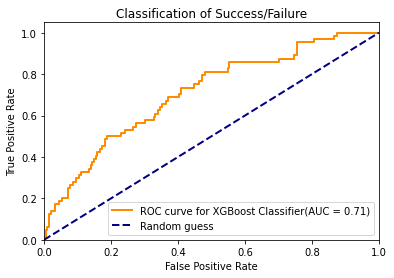

In [42]:
from sklearn.metrics import roc_curve, auc, accuracy_score
roc_p = roc_curve(y_val_bin, y_proba)
auc_p = auc_p = auc( roc_p[0], roc_p[1] )

plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange', lw=line_width,
         label=f"ROC curve for XGBoost Classifier(AUC = {auc_p:0.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Success/Failure')
plt.legend(loc='lower right')
plt.show()



Evaluate over the test set

In [68]:
# Make predictions for the test set
y_pred_test = clf.predict(X_test)

In [69]:
y_proba_test = clf.predict_proba(X_test)[:,1]

In [70]:
y_pred_test_pc = [1 if i > 0.39 else 0 for i in y_proba_test]
cm=confusion_matrix(y_test, y_pred_test_pc)
cm_df = pd.DataFrame(cm.astype(int))
cm_df
#columns,index

,0,1
0,175,92
1,26,47


In [71]:
y_proba_test =clf.predict_proba(X_test)[:,1]

In [72]:
CM =confusion_matrix(y_test, y_pred_test_pc)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TNR_test = TN/(TN+FP)
TPR_test = TP/(TP+FN)
FNR_test= FN/(TP+FN)

print("The True Negative Rate in the test set is: ","{:.2%}".format(TNR_test))

print("The True Positive Rate in the test set is: ","{:.2%}".format(TPR_test))

print("The False Negative Rate in the test set is: ","{:.2%}".format(FNR_test))

The True Negative Rate in the test set is:  65.54%
The True Positive Rate in the test set is:  64.38%
The False Negative Rate in the test set is:  35.62%


In [73]:
y_pred_test_bin = y_pred_test_pc
y_test_bin = y_test.to_numpy()

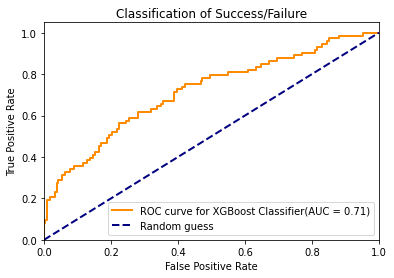

In [74]:
roc_p = roc_curve(y_test_bin, y_proba_test)
auc_p = auc_p = auc( roc_p[0], roc_p[1] )

plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange', lw=line_width,
         label=f"ROC curve for XGBoost Classifier(AUC = {auc_p:0.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Success/Failure')
plt.legend(loc='lower right')
plt.show()

In [75]:
print(classification_report(y_test, y_pred_test_pc))

              precision    recall  f1-score   support

           0       0.87      0.66      0.75       267
           1       0.34      0.64      0.44        73

    accuracy                           0.65       340
   macro avg       0.60      0.65      0.60       340
weighted avg       0.76      0.65      0.68       340



So accuracy of the model before the threshold was a bit higher, but now recall is higher which is more important in our case.